In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import requests
from PIL import Image as PILImage
from io import BytesIO
import requests
import pandas as pd
import threading

In [39]:
df = pd.read_csv('erasmus.csv',index_col=False)

In [41]:
df.insert(0, 'Id', range(5000, 5000 + len(df)))

MissingSchema: Invalid URL 'T': No scheme supplied. Perhaps you meant https://T?

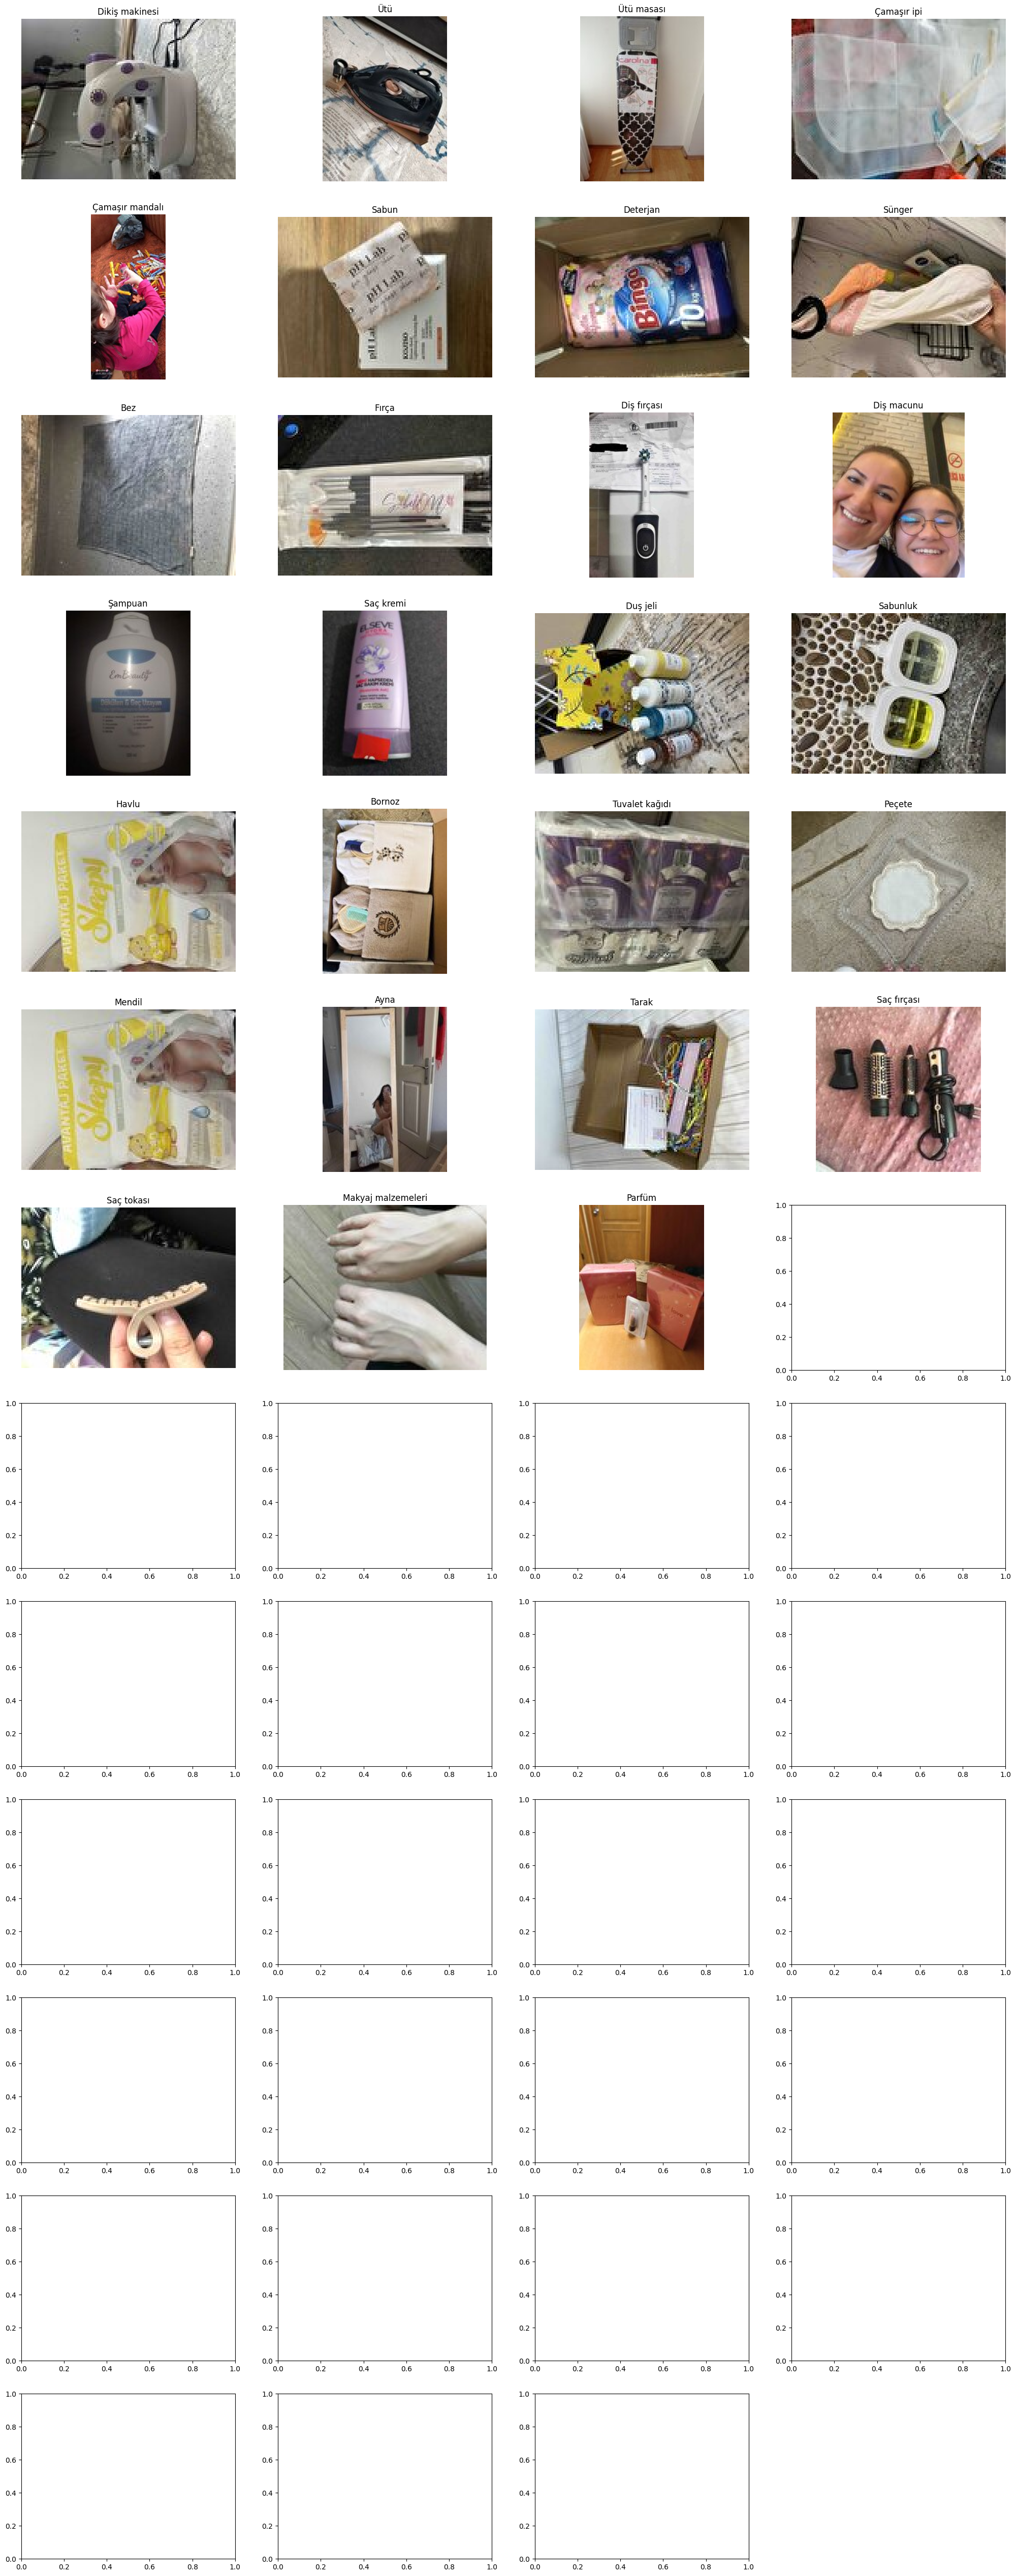

In [14]:
row_number = len(df['searched_key_word'].unique())//4 + 1
fig, axes = plt.subplots(nrows=row_number, ncols=4, figsize=(25, 5*row_number))
plt.axis('off')

col = 0
row = 0
for i in df['searched_key_word'].unique():
    image_path = df['image_path'][df['searched_key_word']== i ].head(1).values[0]

    response = requests.get(image_path)
    img = PILImage.open(BytesIO(response.content))
    axes[row, col].imshow(img)
    axes[row, col].set_title(i)
    axes[row, col].axis('off')
    col += 1

    if col == 4:
        col = 0
        row += 1

for r in range(row_number):
    for c in range(4):
        if r * 4 + c >= len(df['searched_key_word'].unique()):
            axes[r, c].axis('off')  # Kullanılmayan eksenleri kapat

plt.tight_layout()
plt.show()

In [15]:
#df_cleaned =  pd.DataFrame(columns=['Id','product_name','width','height','image_path'])
df_cleaned = pd.read_csv('3.1data.csv')
df_cleaned.tail(4)

,Id,product_name,width,height,image_path
10064,5952,Ph_Lab,0.0,0.0,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2022913/876268943/48958449-1738679682640.jpeg
10065,5953,Ph_Lab,0.0,0.0,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2022913/876268943/48958449-1738679681929.jpeg
10066,5954,Ph_Lab,0.0,0.0,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2024907/876268943/91168486-1738833623981.jpeg
10067,5955,Ph_Lab,0.0,0.0,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2019922/2033880/876268943/166949797-1736946576212.jpeg


In [44]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_filtered = pd.concat([df[df['title'] == search].head(1) for search in df['title'].unique()], ignore_index=True)

df_filtered

,Id,searched_key_word,brand,title,find_dim,find_dim_from_content,guess_dimensions,guess_dim_from_comment,image_path
0,5000,Tekzen,Tekzen,BAMBU KATLANIR STOR PERDE,[],NaN,"merhaba, boylar standart 180cm enler 60-80-100-120-150 cmden oluşmaktadır.",60/80/100/120/150 en boy 180 cm bulunmaktadır,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2026901/2032883/744812379/61241969-1726407879800.jpeg
1,5060,Tekzen,Tekzen,Bambu Katlamalı Stor Perd,[],NaN,NaN,NaN,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2028895/2030889/744818643/3795651-1702518712216.jpeg
2,5078,Tekzen,Tekzen,Bambu Stor Perd,[],NaN,geni̇şli̇k 150 cm mevcuttur,NaN,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2022913/2033880/704859274/13826312-1687005171634.jpeg
3,5250,Tekzen,Tekzen,KOPYA - Bambu Stor Perd,[],NaN,NaN,merhaba yoktur boy standar 180 cm dir,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2026901/2035874/745598839/73829590-1697733963771.jpeg
4,5258,Mudo Concept,Mudo Concept,Elephant Wıld Fincan 1108927001,[],NaN,NaN,merhaba ürün ölçüleri en:9 boy:6 yükseklik:6 cm' dir. i̇yi günler dileriz.,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2022913/4155110/45930980-1738670691795.jpeg
5,5318,Mudo Concept,Mudo Concept,Bulaşık Kurutma Matı - Gri,[],[],"merhaba, 45*36 cm'dir. i̇yi günler dileriz.","merhaba, 45*36 cm'dir. i̇yi günler dileriz.",https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2021916/2032883/683826917/16965884-1684208747563.jpeg
6,5378,Mudo Concept,Mudo Concept,Eskitme Bej Duvar Saati,[],NaN,"merhaba, ürün çapı 45 cm'dir. i̇yi günler dileriz.",merhaba ürünün en ve boy ölçüsü 45 cm'dir.i̇yi günler dileriz.,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2024907/2032883/4430812/21307244-1663408269707.jpeg
7,5438,Mudo Concept,Mudo Concept,Elephant Wild Mug,[],NaN,NaN,"merhaba, en: 8.5 boy: 8.5 yükseklik: 10cm'dir. i̇yi günler dileriz.",https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2024907/2021916/4186791/48724461-1662450029234.jpeg
8,5458,Mudo Concept,Mudo Concept,Ekru Servis Tabağı 25cm,[],NaN,NaN,"merhaba, ekru serisinde 27 cm'lik ürün bulunmamaktadır. 25 cm servis tabağı ve 22cm çukur yemek tabağı mevcuttur. i̇yi günler dileriz.",https://review-rating.mncdn.com/mnresize/140/210/prod/img/2014937/2025904/2023910/3696240/9812310-1636445885111.jpeg
9,5518,Mudo Concept,Mudo Concept,Paula Brown Duvar Saati 50cm,['50 cm çapındaki geniş ekranı ile kolay okunabilirlik sağlar ve zamanı hızlıca takip etmenize olanak tanır'],NaN,NaN,NaN,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2022913/2041856/362746521/1484691-1687695553652.jpeg


In [66]:
for name in df['title'].unique():
    single_word = name.replace(' ','_')
    if len(df_cleaned[df_cleaned['product_name']==single_word]) == 0:
        images_paths = df['image_path'][df['title']==name]
        print('title: ' + name)
        print('searched_key_word: ' + df_filtered['searched_key_word'][df_filtered['title']==name].values[0])
        print(df_filtered['image_path'][df_filtered['title']==name].values[0])
        filtered_data = df_filtered[df_filtered['title'] == name][['find_dim', 'find_dim_from_content', 'guess_dimensions', 'guess_dim_from_comment']].values[0]
        print(filtered_data)
        height = float(input( 'height: '))
        width = float(input('width: '))
        for img in images_paths:
            product_name = single_word
            Id = df.loc[df['image_path']==img,'Id'].values[0]
            df_cleaned.loc[len(df_cleaned)] = [Id, product_name, width,height, img]

In [68]:
df_cleaned.to_csv('3.3data.csv',index = False)

In [60]:
df_cleaned.to_csv('3.2data.csv', index=False)

In [64]:
df_cleaned.loc[df_cleaned['product_name'] == '365_Fonksiyonel_Rende_Ve_Dilimleme_Aparatı_Siyah', 'width'] = 10


In [75]:
import os
from tqdm import tqdm

# Folder where the images will be saved
save_dir = "dimension_images"
os.makedirs(save_dir, exist_ok=True)

# Extract URLs and IDs from the DataFrame
for _, row in tqdm(df.iterrows(), total=len(df), desc="Downloading images"):
    product_id = row[0]  # Second column (e.g., 4758, 4759, etc.)
    product_name = row[1]  # Third column (e.g., glass_cleaning_device)
    url = row[4]  # Sixth column (URL)

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error if there is an HTTP issue

        # Generate the file name (example: glass_cleaning_device_4758.jpg)
        file_name = os.path.join(save_dir, f"{product_name}_{product_id}.jpg")

        # Save the image
        with open(file_name, "wb") as img_file:
            img_file.write(response.content)

    except Exception as e:
        print(f"Error! Failed to download {url}: {e}")

print("Download completed.")

  product_id = row[0]  # Second column (e.g., 4758, 4759, etc.)
C:\Users\Gökhan ergül\AppData\Local\Temp\ipykernel_14188\1999954361.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  product_name = row[1]  # Third column (e.g., glass_cleaning_device)
C:\Users\Gökhan ergül\AppData\Local\Temp\ipykernel_14188\1999954361.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = row[4]  # Sixth column (URL)

Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2014937/2026901/2018925/33880506/16751656-1638565378995.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/83828129/94539325-1739457537722.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2026901/2030889/1068591/32957525-1668515065812.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2036871/40540301/73927710-1674222439767.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2020919/2045844/267299032/31713818-1653896780837.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2036871/666992559/15376527-1739872837523.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2019922/2039862/42890489/3921421-1708624300354.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/285686239/63280756-1739464485030.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Download completed.


In [78]:
files = os.listdir('dimension_images/')
len(files)

2993

In [79]:
df[df['product_name']=='toy_gun']

,Id,product_name,width,height,image_path
2100,3445,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2019922/2032883/267299032/32622726-1650189236454.jpeg
2101,3446,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2023910/2026901/267299032/16116668-1717940583316.jpeg
2102,3447,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2021916/2033880/267299032/16285724-1684315457142.jpeg
2103,3448,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2024907/2041856/267299032/12091617-1664218700781.jpeg
2104,3449,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2018925/2039862/267299032/6735474-1677167004283.jpeg
2105,3450,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2031886/267299032/14266648-1673777409991.jpeg
2106,3451,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2036871/267299032/74087234-1674205661004.jpeg
2107,3452,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2018925/2044847/267299032/78831244-1677573744338.jpeg
2108,3453,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/267299032/143629085-1739453223918.jpeg
2109,3454,toy_gun,15.0,8.5,https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2026901/267299032/14332963-1673350140831.jpeg
